<a href="https://colab.research.google.com/github/Mukeshburdak/Resturant_revenue_prediction/blob/main/Recommendations_with_Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1 :Predict Restaurant Ratings

Resturant data analysis

In [ ]:
# making the imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Restaurant_revenue.csv') # read the data
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


Dta Preprocessing

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Number_of_Customers,0
Menu_Price,0
Marketing_Spend,0
Cuisine_Type,0
Average_Customer_Spending,0
Promotions,0
Reviews,0
Monthly_Revenue,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.columns

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')

Data Visualization

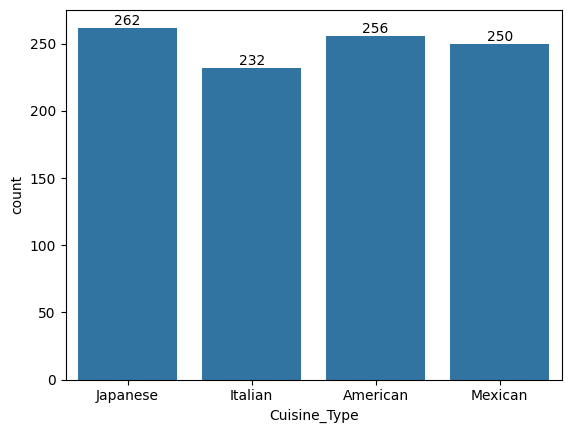

In [ ]:
x = sns.countplot(x = 'Cuisine_Type',data = df)

for bars in x.containers:
    x.bar_label(bars)

<Axes: xlabel='Cuisine_Type', ylabel='Menu_Price'>

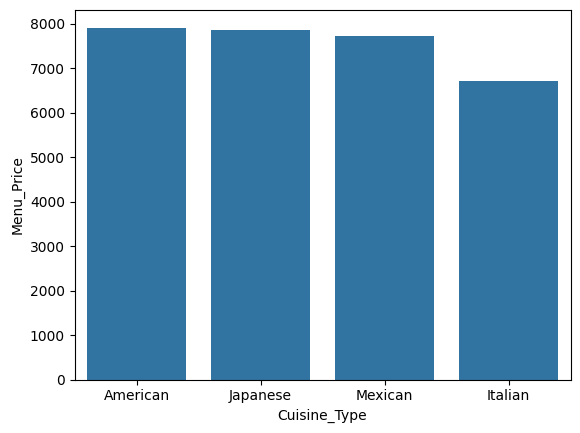

In [ ]:
country_price = df.groupby(['Cuisine_Type'] ,as_index=False)['Menu_Price'].sum().sort_values(by ='Menu_Price',ascending=False)
sns.barplot(x = 'Cuisine_Type',y = 'Menu_Price' ,data = country_price)

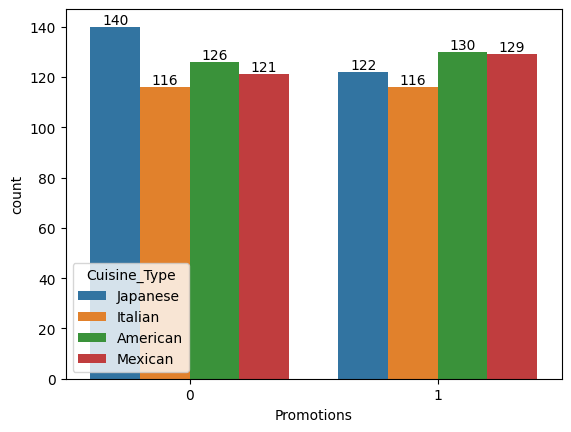

In [ ]:
x = sns.countplot(data = df ,x = 'Promotions',hue ='Cuisine_Type' )

for bars in x.containers:
    x.bar_label(bars)

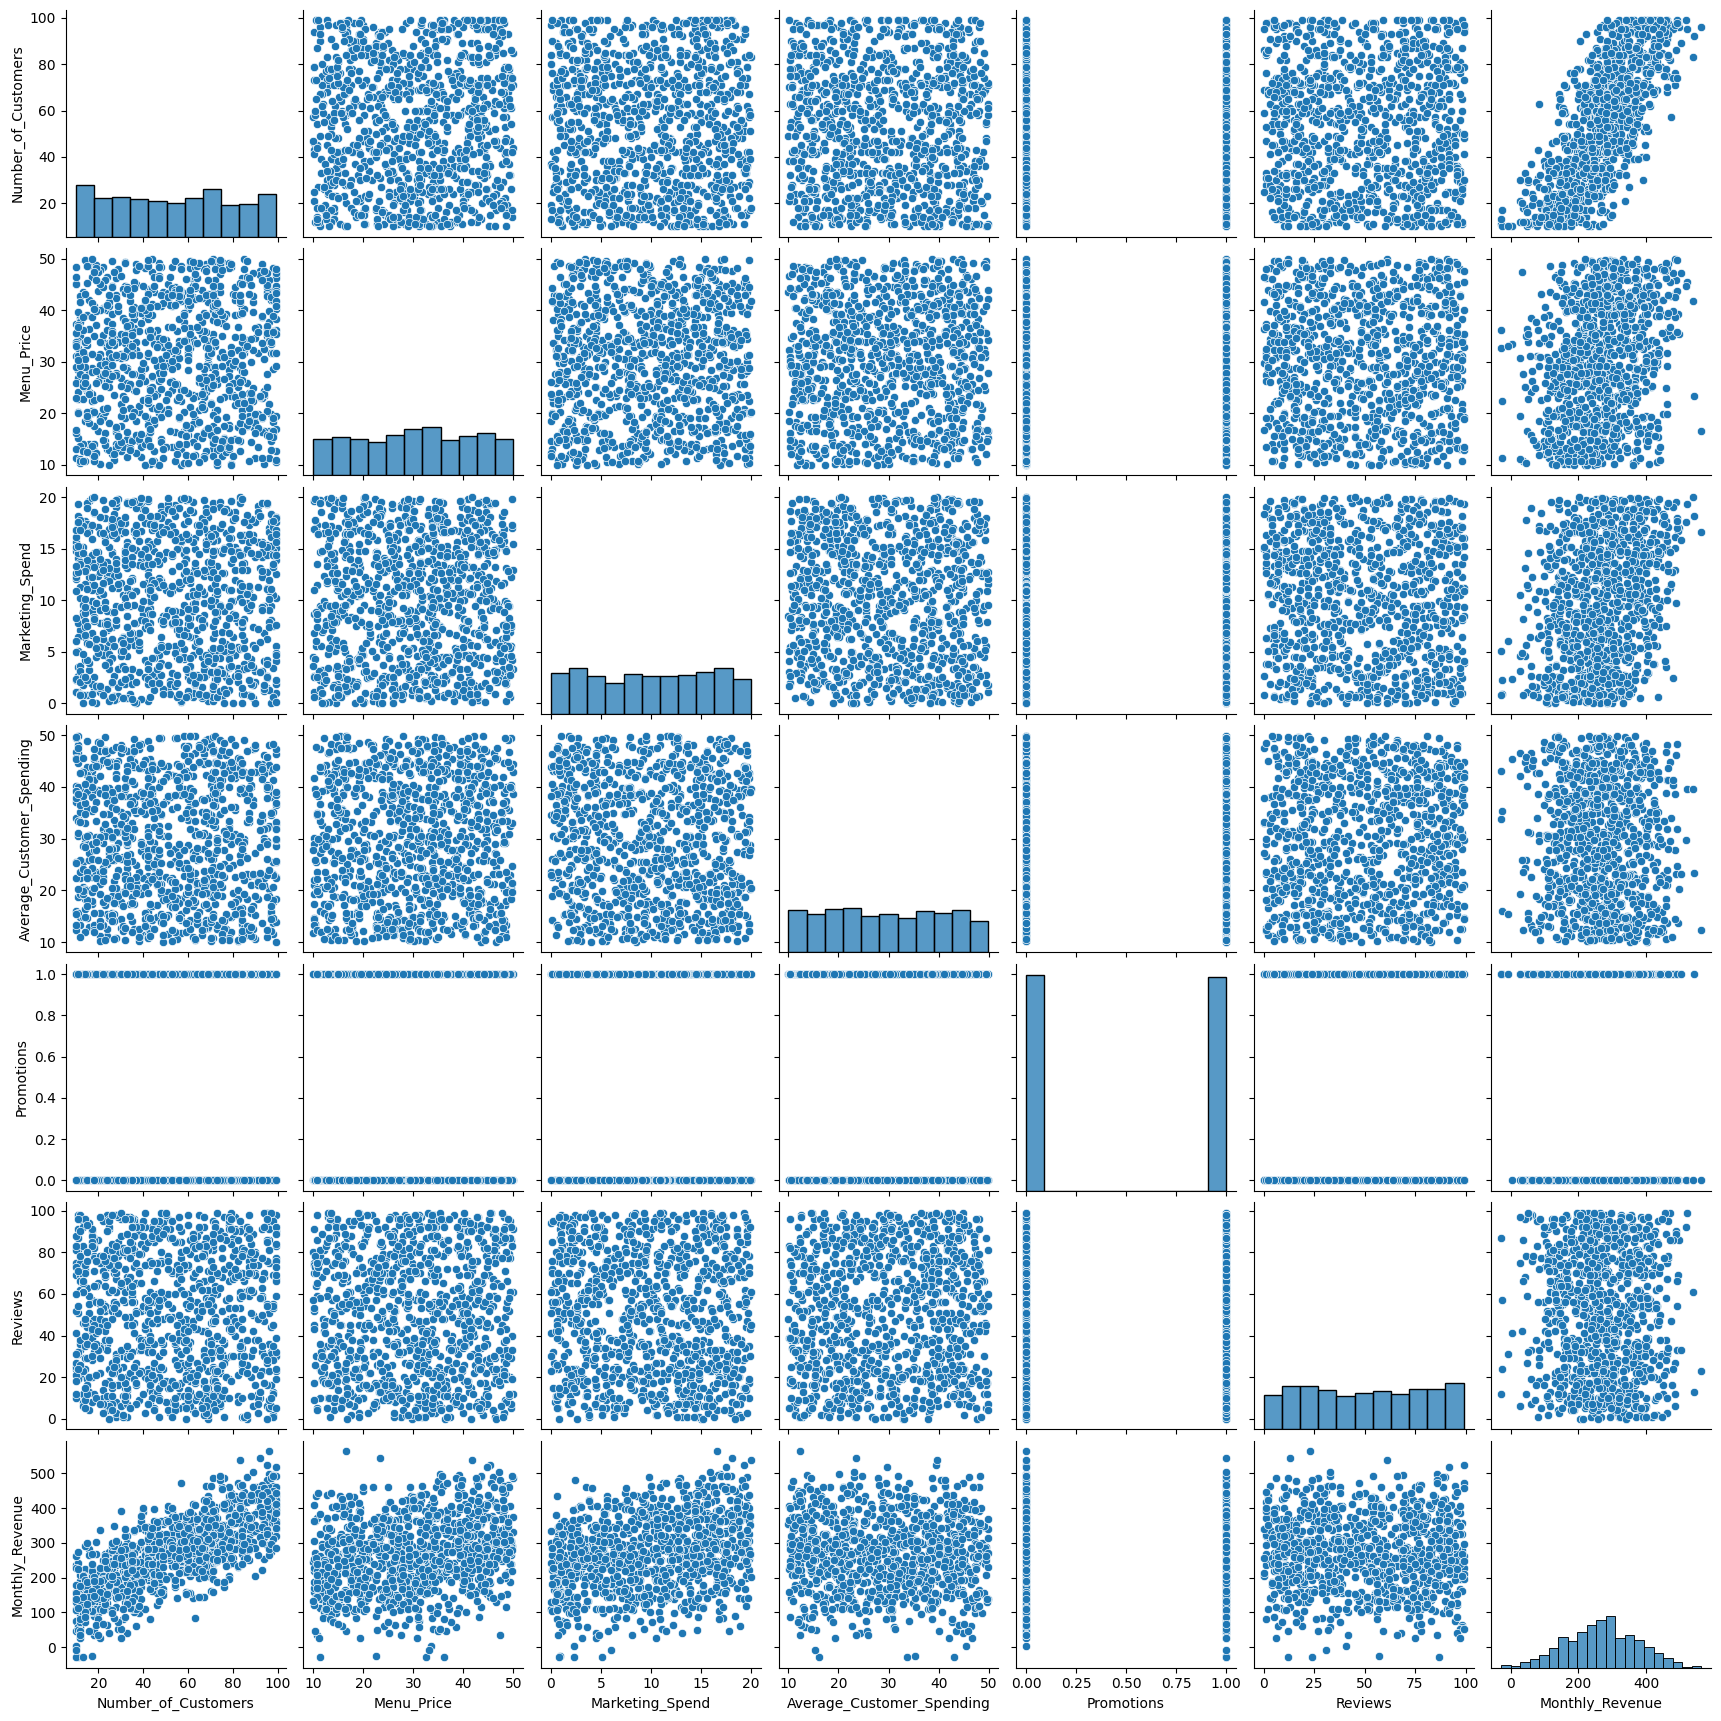

In [ ]:
sns.pairplot(df)

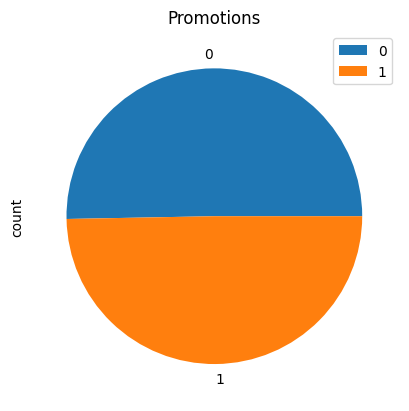

In [ ]:
df["Promotions"].value_counts().plot(kind='pie')
plt.title("Promotions")
plt.legend()
plt.show()

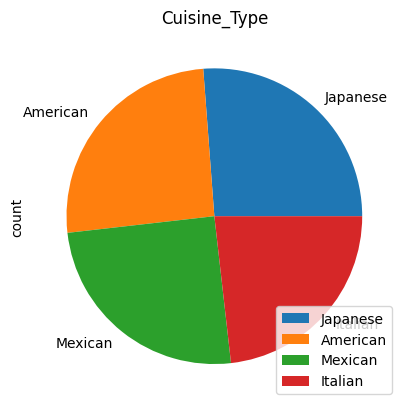

In [ ]:
df["Cuisine_Type"].value_counts().plot(kind='pie')
plt.title("Cuisine_Type")
plt.legend()
plt.show()

In [ ]:
x = df[['Number_of_Customers','Menu_Price','Marketing_Spend','Average_Customer_Spending','Promotions','Reviews','Monthly_Revenue']]

In [ ]:
y = df['Cuisine_Type']

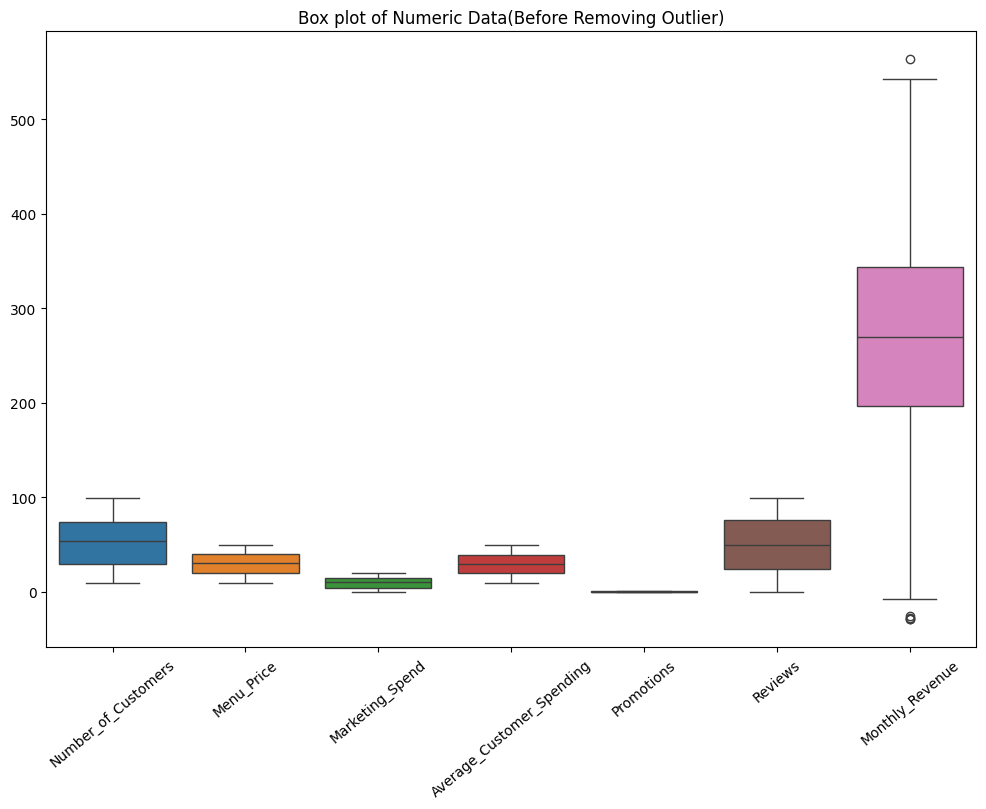

In [ ]:
##Before Removing Outlier.
plt.figure(figsize=(12,8))
sns.boxplot(data = x)
plt.xticks(rotation = 40)
plt.title("Box plot of Numeric Data(Before Removing Outlier)")
plt.show()

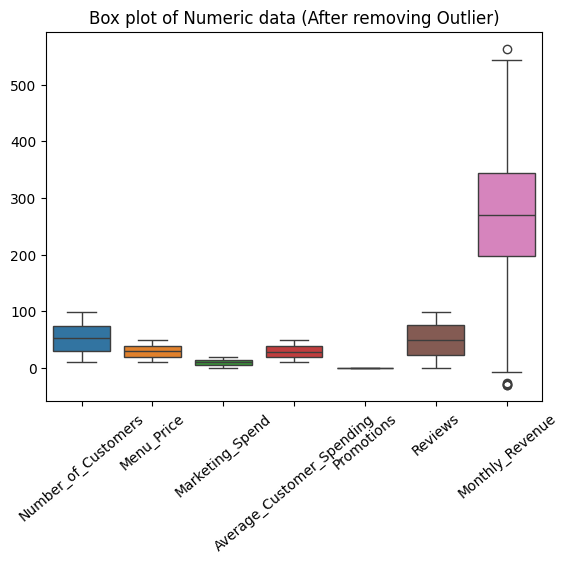

In [ ]:
##After Removing Outlier.
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)]

##Create a box plot after removing outlier
plt.Figure(figsize=(12,8))
sns.boxplot(data= x)
plt.xticks(rotation = 40)
plt.title("Box plot of Numeric data (After removing Outlier)")
plt.show()

Correlationship

<Axes: >

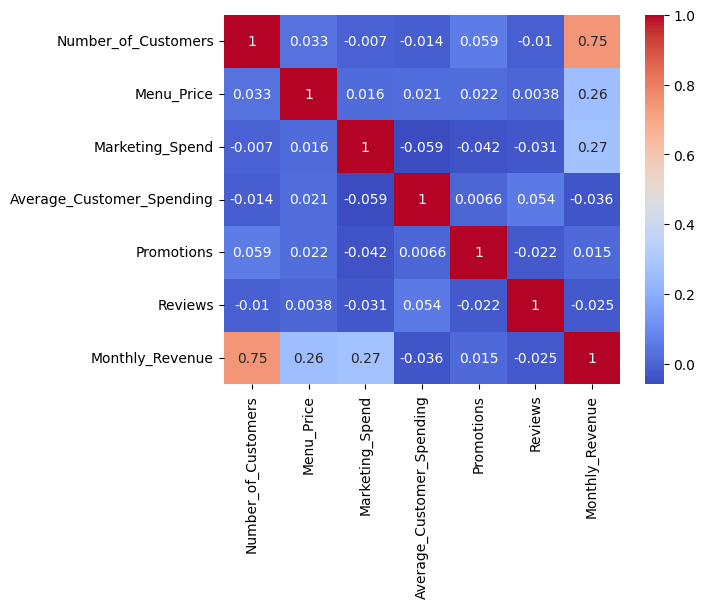

In [ ]:
plt.Figure(figsize=(12,8))
sns.heatmap(x.corr(),cmap='coolwarm',annot=True)

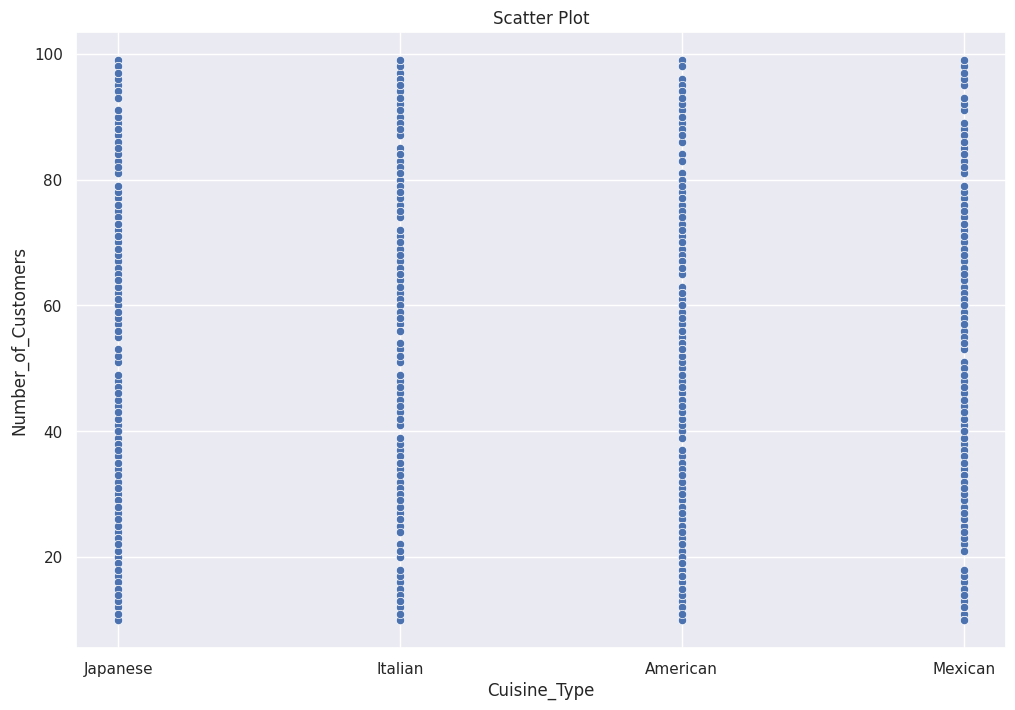

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(12,8))
sns.scatterplot(x ='Cuisine_Type' ,y ='Number_of_Customers' ,data = df)
plt.title("Scatter Plot")
plt.show()

Supervised Learning

In [ ]:
# Importing all Models.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Linear Regression

In [ ]:
# Select features (X) and target variable (y)
# Let's predict 'Monthly_Revenue' based on other numerical features
X = df_cleaned[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Reviews']]
y = df_cleaned['Monthly_Revenue']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Also look at the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 3152.4640181487935
R-squared: 0.6627053139866661
Coefficients: [ 2.89838637  2.27719561  4.67316943 -0.05670598 -0.06304083]
Intercept: 3.7512829670012593


In [ ]:
# Cross-validation
scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.71375095 0.66610927 0.64145395 0.65362286 0.69930317]
Mean cross-validation score: 0.6748480381290469


Visualization of linear regrassion

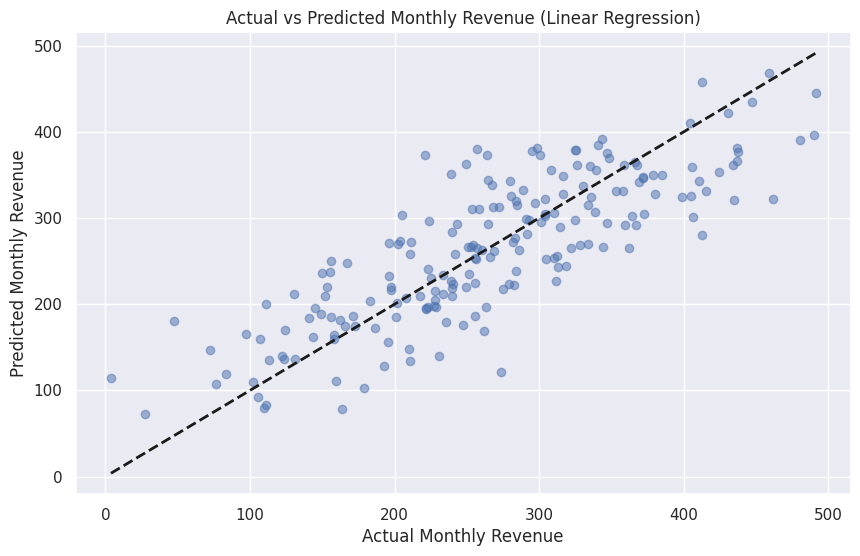

In [ ]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Plot a diagonal line for perfect prediction
plt.xlabel("Actual Monthly Revenue")
plt.ylabel("Predicted Monthly Revenue")
plt.title("Actual vs Predicted Monthly Revenue (Linear Regression)")
plt.show()

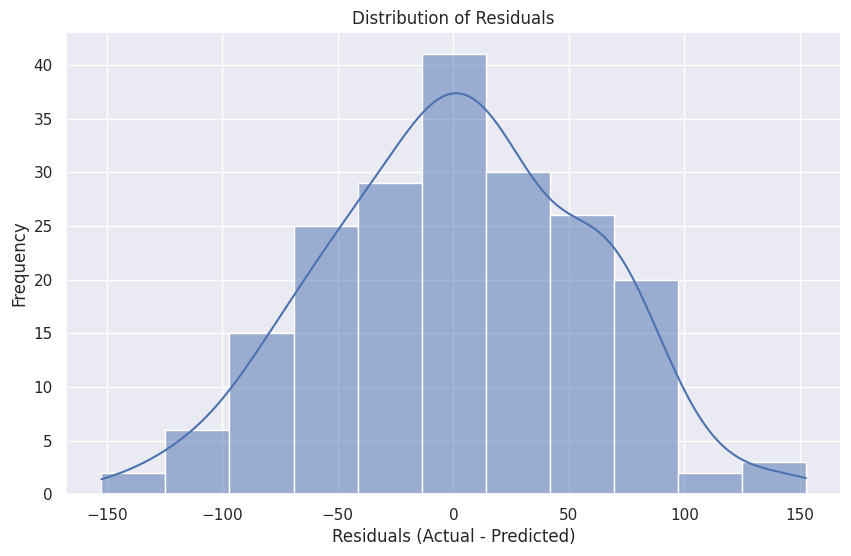

In [ ]:
# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

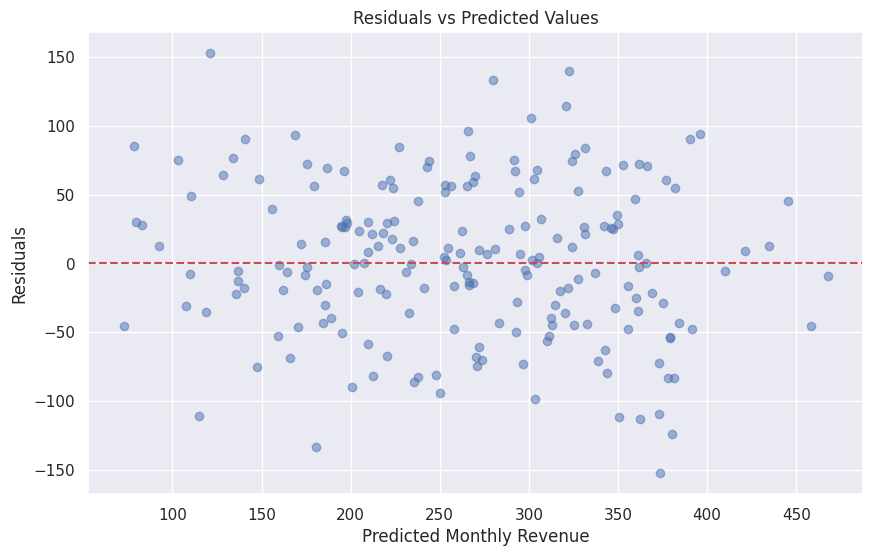

In [ ]:
# Visualize the residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Monthly Revenue")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decision Tree Classifier
# Select features (X) and target variable (y)
# We will use Cuisine_Type as the target variable and numerical features as features
X_dt = df_cleaned[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Reviews', 'Monthly_Revenue']]
y_dt = df_cleaned['Cuisine_Type']

In [ ]:
# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree Classifier model
model_dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model
model_dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_dt = model_dt.predict(X_test_dt)

In [ ]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.25125628140703515


In [ ]:
# Print classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

    American       0.12      0.13      0.13        39
     Italian       0.35      0.29      0.31        56
    Japanese       0.25      0.28      0.26        50
     Mexican       0.27      0.28      0.27        54

    accuracy                           0.25       199
   macro avg       0.25      0.24      0.24       199
weighted avg       0.26      0.25      0.25       199



In [ ]:
# Print confusion matrix
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test_dt, y_pred_dt))


Decision Tree Confusion Matrix:
[[ 5 13 12  9]
 [12 16 13 15]
 [ 9 10 14 17]
 [14  7 18 15]]


Visualize the Tree

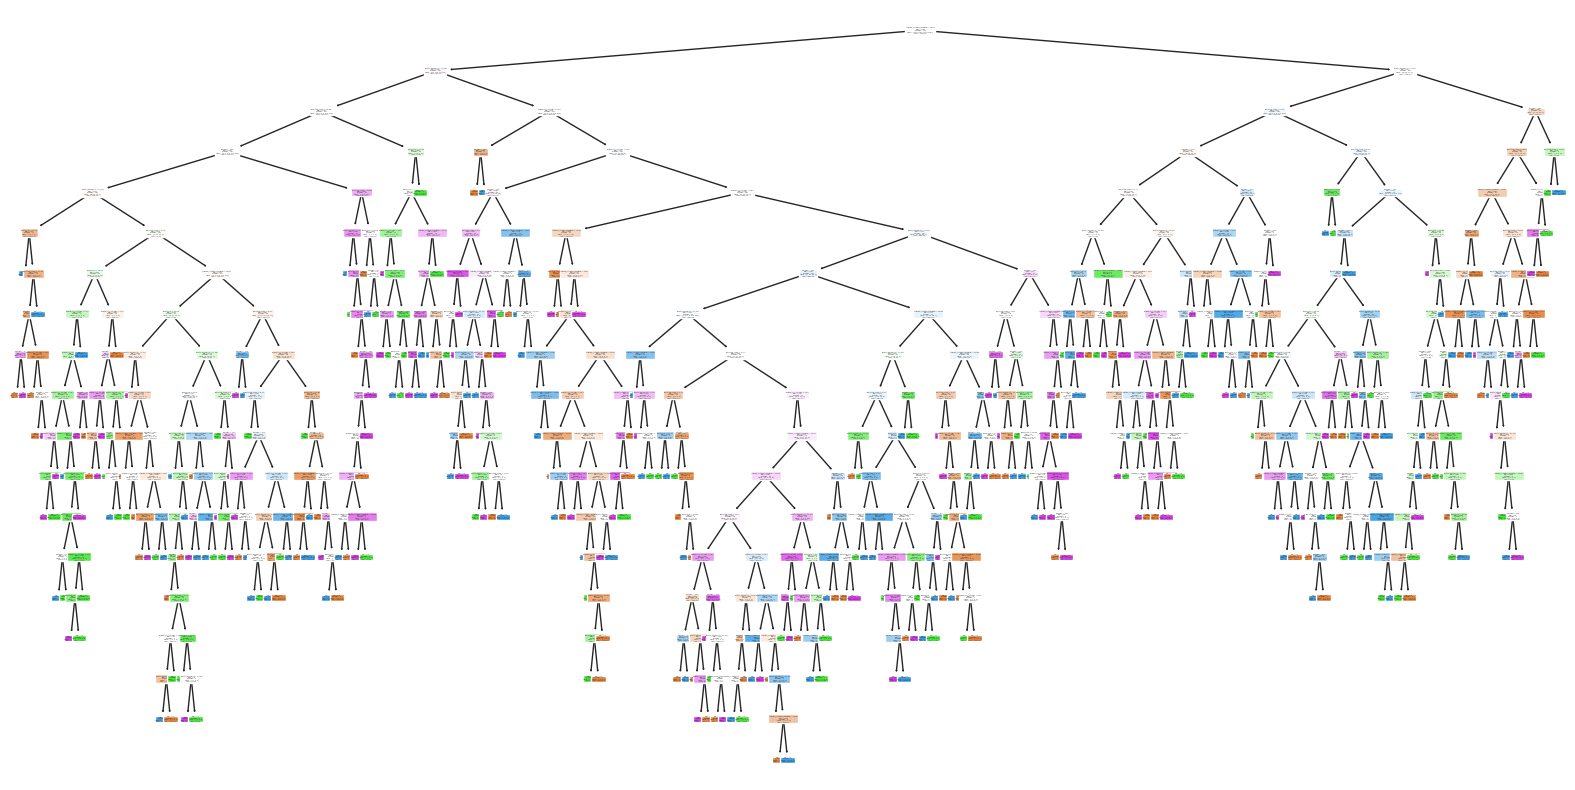

In [ ]:
# visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_dt, feature_names=X_dt.columns.tolist(), class_names=model_dt.classes_.tolist(), filled=True)
plt.show()

Task-2 : 'Cuisine_Type' classification

Logistic Regression

In [ ]:
# Logistic Regression for Cuisine_Type classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_dt_scaled = scaler.fit_transform(X_train_dt)
X_test_dt_scaled = scaler.transform(X_test_dt)

In [ ]:
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_dt_scaled, y_train_dt)
y_pred_lr = model_lr.predict(X_test_dt_scaled)

In [ ]:
 print("\nLogistic Regression Accuracy:", accuracy_score(y_test_dt, y_pred_lr))
 print("\nLogistic Regression Classification Report:")
 print(classification_report(y_test_dt, y_pred_lr))


Logistic Regression Accuracy: 0.19597989949748743

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    American       0.14      0.28      0.19        39
     Italian       0.30      0.11      0.16        56
    Japanese       0.19      0.20      0.19        50
     Mexican       0.26      0.22      0.24        54

    accuracy                           0.20       199
   macro avg       0.22      0.20      0.19       199
weighted avg       0.23      0.20      0.19       199




Logistic Regression Confusion Matrix:
[[11  5 17  6]
 [21  6 14 15]
 [20  6 10 14]
 [26  3 13 12]]


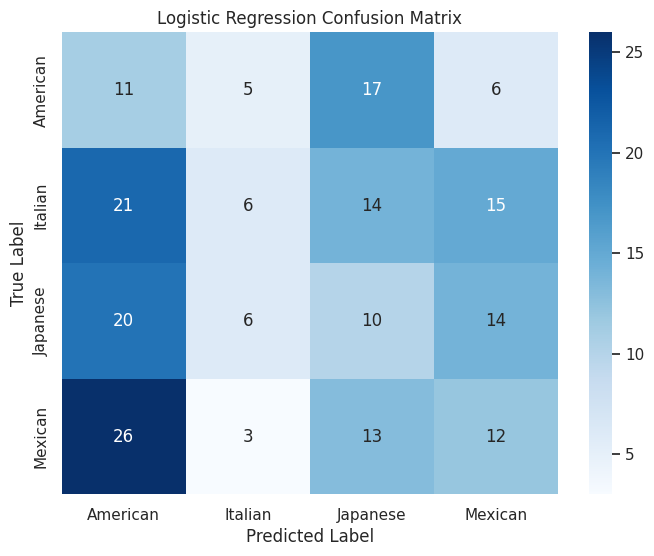

In [ ]:
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_dt, y_pred_lr))

# Get the unique class names
class_names_lr = model_lr.classes_

# Plot the confusion matrix
cm_lr = confusion_matrix(y_test_dt, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_lr, yticklabels=class_names_lr)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Task-3 : Resturant Recommandation

In [ ]:
def recommend_cuisine(number_of_customers, menu_price, marketing_spend, average_customer_spending, reviews, monthly_revenue, scaler, model_lr):

    # Create a numpy array with the input features in the correct order
    new_restaurant_features = np.array([[number_of_customers, menu_price, marketing_spend, average_customer_spending, reviews, monthly_revenue]])

    # Scale the new features using the same scaler used during training
    new_restaurant_features_scaled = scaler.transform(new_restaurant_features)

    # Predict the cuisine type
    predicted_cuisine = model_lr.predict(new_restaurant_features_scaled)[0]

    return predicted_cuisine

# Example usage with hypothetical new restaurant data:
new_restaurant_data = {
    'Number_of_Customers': 150.0,
    'Menu_Price': 25.0,
    'Marketing_Spend': 5000.0,
    'Average_Customer_Spending': 30.0,
    'Reviews': 200.0,
    'Monthly_Revenue': 45000.0
}

predicted_recommendation = recommend_cuisine(
    new_restaurant_data['Number_of_Customers'],
    new_restaurant_data['Menu_Price'],
    new_restaurant_data['Marketing_Spend'],
    new_restaurant_data['Average_Customer_Spending'],
    new_restaurant_data['Reviews'],
    new_restaurant_data['Monthly_Revenue'],
    scaler,  # Use the scaler fitted before training model_lr
    model_lr # Use the trained Logistic Regression model
)

print(f"\nBased on the features, the recommended cuisine type is: {predicted_recommendation}")



Based on the features, the recommended cuisine type is: Japanese


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
